In [38]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import nltk
import re
import string

In [39]:
df = pd.read_csv('youtube-comments.csv')

In [40]:
df.head(5)

,authorDisplayName,textDisplay
0,@daneayu,Kalo blm pernah terpisah maut dgn pasangan blm...
1,@ClanAtomicZezier,Peler lah😂😂😂<br><br><br><br><br><br><br>Press ...
2,@TommyFransisko,Silahkan Dihujat<br>Sesuka Hati...... 😂
3,@raa.02,19 juta lapangan pekerjaan nya mana gibran wap...
4,@langlanglajulayang,Ga ada isinya !


In [41]:
example = df['textDisplay'][65]
print(example)

Di rekomendasi di tonton di kecepatan 4x biar cepat selesai ya guys ya


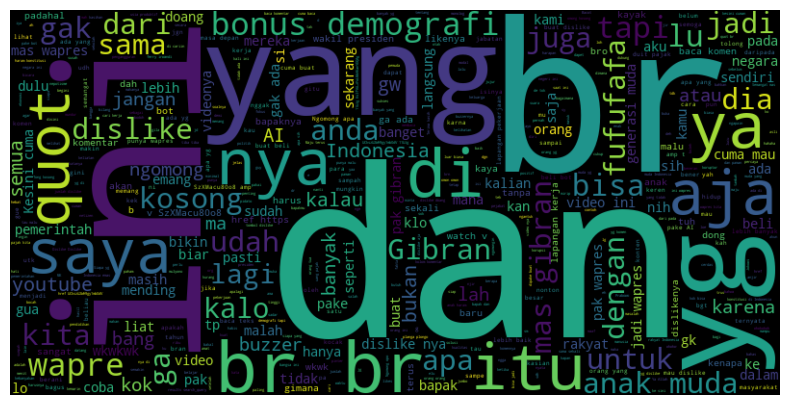

In [42]:
# Wordcloud before preprocessing
stopwords = set(STOPWORDS)

text = ' '.join(df['textDisplay'].astype(str).tolist())

wc = WordCloud(stopwords=stopwords, max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

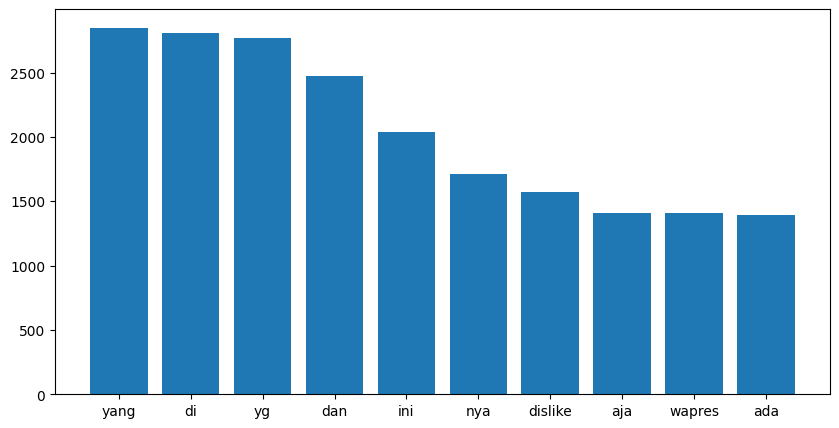

In [43]:
from collections import Counter

text = ' '.join(df_use['textDisplay'])

tokens = [word for word in text.split()]
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)
word, count = zip(*top_words)

plt.figure(figsize=(10,5))
bars = plt.bar(word, count)

In [44]:
# copy the dataset
df_use = df.copy()

In [45]:
def remove_url(textDisplay):
    if textDisplay is not None and isinstance(textDisplay, str):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', textDisplay)
    else:
        return textDisplay
    
def remove_html(textDisplay):
    if textDisplay is not None and isinstance(textDisplay, str):
        html = re.compile(r'<.*?>')
        return html.sub(r'', textDisplay)
    else:
        return textDisplay
    
# def remove_emoji(textDisplay):
#     if textDisplay is not None and isinstance(textDisplay, str):

def remove_symbol(textDisplay):
    if textDisplay is not None and isinstance(textDisplay, str):
        textDisplay = re.sub(r'[^a-zA-Z0-9\s]','',textDisplay)
    return textDisplay
    

df_use['cleanedText'] = df_use['textDisplay'].apply(lambda x: remove_url(x))
df_use['cleanedText'] = df_use['cleanedText'].apply(lambda x: remove_symbol(x))
df_use['cleanedText'] = df_use['cleanedText'].apply(lambda x: remove_html(x))


df_use.head(25)

,authorDisplayName,textDisplay,cleanedText
0,@daneayu,Kalo blm pernah terpisah maut dgn pasangan blm...,Kalo blm pernah terpisah maut dgn pasangan blm...
1,@ClanAtomicZezier,Peler lah😂😂😂<br><br><br><br><br><br><br>Press ...,Peler lahbrbrbrbrbrbrbrPress it dent go block
2,@TommyFransisko,Silahkan Dihujat<br>Sesuka Hati...... 😂,Silahkan DihujatbrSesuka Hati
3,@raa.02,19 juta lapangan pekerjaan nya mana gibran wap...,19 juta lapangan pekerjaan nya mana gibran wap...
4,@langlanglajulayang,Ga ada isinya !,Ga ada isinya
5,@kiswan-g6z,"AKU SETUJU DPR SEGERA MENGANTI GIBRAN ,,,",AKU SETUJU DPR SEGERA MENGANTI GIBRAN
6,@kiswan-g6z,SANGAT SETUJU GIBRAN SEGERA DI GANTI INDONESIA...,SANGAT SETUJU GIBRAN SEGERA DI GANTI INDONESIA...
7,@tailorku,Nyari komentar yang positif susah amat ya😂<br>...,Nyari komentar yang positif susah amat yabrMen...
8,@bubblines,bacot karbit,bacot karbit
9,@KingsmanHakim,Sok keren wapres dinasti,Sok keren wapres dinasti


In [46]:
def case_folding(text):
    if isinstance(text, str):
        lowercasetxt = text.lower()
        return lowercasetxt
    else:
        return lowercasetxt

df_use['case_foldedText'] = df_use['cleanedText'].apply(case_folding)
df_use.head(25)

,authorDisplayName,textDisplay,cleanedText,case_foldedText
0,@daneayu,Kalo blm pernah terpisah maut dgn pasangan blm...,Kalo blm pernah terpisah maut dgn pasangan blm...,kalo blm pernah terpisah maut dgn pasangan blm...
1,@ClanAtomicZezier,Peler lah😂😂😂<br><br><br><br><br><br><br>Press ...,Peler lahbrbrbrbrbrbrbrPress it dent go block,peler lahbrbrbrbrbrbrbrpress it dent go block
2,@TommyFransisko,Silahkan Dihujat<br>Sesuka Hati...... 😂,Silahkan DihujatbrSesuka Hati,silahkan dihujatbrsesuka hati
3,@raa.02,19 juta lapangan pekerjaan nya mana gibran wap...,19 juta lapangan pekerjaan nya mana gibran wap...,19 juta lapangan pekerjaan nya mana gibran wap...
4,@langlanglajulayang,Ga ada isinya !,Ga ada isinya,ga ada isinya
5,@kiswan-g6z,"AKU SETUJU DPR SEGERA MENGANTI GIBRAN ,,,",AKU SETUJU DPR SEGERA MENGANTI GIBRAN,aku setuju dpr segera menganti gibran
6,@kiswan-g6z,SANGAT SETUJU GIBRAN SEGERA DI GANTI INDONESIA...,SANGAT SETUJU GIBRAN SEGERA DI GANTI INDONESIA...,sangat setuju gibran segera di ganti indonesia...
7,@tailorku,Nyari komentar yang positif susah amat ya😂<br>...,Nyari komentar yang positif susah amat yabrMen...,nyari komentar yang positif susah amat yabrmen...
8,@bubblines,bacot karbit,bacot karbit,bacot karbit
9,@KingsmanHakim,Sok keren wapres dinasti,Sok keren wapres dinasti,sok keren wapres dinasti


In [47]:
def replace_nonbaku(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
                else:
                    replaced_words.append(word)
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
        return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash
    else:
        return '', [], [], []

In [48]:
dat_temp = pd.DataFrame(df_use[['authorDisplayName','textDisplay','cleanedText','case_foldedText']])
dat_temp.head()

,authorDisplayName,textDisplay,cleanedText,case_foldedText
0,@daneayu,Kalo blm pernah terpisah maut dgn pasangan blm...,Kalo blm pernah terpisah maut dgn pasangan blm...,kalo blm pernah terpisah maut dgn pasangan blm...
1,@ClanAtomicZezier,Peler lah😂😂😂<br><br><br><br><br><br><br>Press ...,Peler lahbrbrbrbrbrbrbrPress it dent go block,peler lahbrbrbrbrbrbrbrpress it dent go block
2,@TommyFransisko,Silahkan Dihujat<br>Sesuka Hati...... 😂,Silahkan DihujatbrSesuka Hati,silahkan dihujatbrsesuka hati
3,@raa.02,19 juta lapangan pekerjaan nya mana gibran wap...,19 juta lapangan pekerjaan nya mana gibran wap...,19 juta lapangan pekerjaan nya mana gibran wap...
4,@langlanglajulayang,Ga ada isinya !,Ga ada isinya,ga ada isinya


In [49]:
kamus_data = pd.read_excel('kamuskatabaku.xlsx')
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))
kamus_tidak_baku


{'woww': 'wow',
 'aminn': 'amin',
 'met': 'selamat',
 'netaas': 'menetas',
 'keberpa': 'keberapa',
 'eeeehhhh': 'eh',
 'kata2nyaaa': 'kata-katanya',
 'hallo': 'halo',
 'kaka': 'kakak',
 'ka': 'kak',
 'daah': 'dah',
 'aaaaahhhh': 'ah',
 'yaa': 'ya',
 'smga': 'semoga',
 'slalu': 'selalu',
 'amiin': 'amin',
 'kk': 'kakak',
 'trus': 'terus',
 'sii': 'sih',
 'nyenengin': 'menyenangkan',
 'bgt': 'banget',
 'gemess': 'gemas',
 'akuuu': 'aku',
 'jgn': 'jangan',
 'udah': 'sudah',
 'gitu': 'begitu',
 'aja': 'saja',
 'gemesiin': 'menggemaskan',
 'menyenangkn': 'menyenangkan',
 'rb': 'ribu',
 'akau': 'aku',
 'saranin': 'menyarankan',
 'nemuin': 'menemukan',
 'yah': 'ya',
 'mnis2nya': 'manis-manisnya',
 'gtu': 'begitu',
 'tu': 'itu',
 'idolaa': 'idola',
 'bangett': 'banget',
 'kaakk': 'kak',
 'baaiikkk': 'baik',
 'telaatt': 'telat',
 'kaak': 'kak',
 'yg': 'yang',
 'lg': 'lagi',
 'skarang': 'sekarang',
 'sempet': 'sempat',
 'karna': 'karena',
 'ngga': 'tidak',
 'mantep': 'mantap',
 'loohhh': 'loh',


In [50]:

dat_temp[['normalisasi', 'Kata_Baku', 'Kata_Tidak_Baku', 'Kata_Tidak_Baku_hash']] = pd.DataFrame(
    dat_temp['case_foldedText'].apply(lambda x: replace_nonbaku(x, kamus_tidak_baku)).tolist(),
    index=dat_temp.index
)
dat_temp['normalisasi']


0        kalau belum pernah terpisah maut dengan pasang...
1           peler lahbrbrbrbrbrbrbrpress itu dent go block
2                             silakan dihujatbrsesuka hati
3        19 juta lapangan pekerjaan ya mana gibran wapr...
4                                         tidak ada isinya
                               ...                        
24225    tokdetok wetok kasihan ya bocah ini serba sala...
24226                                       tidak becus lo
24227    yang dia omongkan padahal tidak mengerti juga ...
24228                                              yapping
24229    gibran kalau anda sadar diri dan masih ada ras...
Name: normalisasi, Length: 24230, dtype: object

In [51]:
df_use = pd.DataFrame(dat_temp[['authorDisplayName','textDisplay','cleanedText','case_foldedText','normalisasi']])
df_use.head()

,authorDisplayName,textDisplay,cleanedText,case_foldedText,normalisasi
0,@daneayu,Kalo blm pernah terpisah maut dgn pasangan blm...,Kalo blm pernah terpisah maut dgn pasangan blm...,kalo blm pernah terpisah maut dgn pasangan blm...,kalau belum pernah terpisah maut dengan pasang...
1,@ClanAtomicZezier,Peler lah😂😂😂<br><br><br><br><br><br><br>Press ...,Peler lahbrbrbrbrbrbrbrPress it dent go block,peler lahbrbrbrbrbrbrbrpress it dent go block,peler lahbrbrbrbrbrbrbrpress itu dent go block
2,@TommyFransisko,Silahkan Dihujat<br>Sesuka Hati...... 😂,Silahkan DihujatbrSesuka Hati,silahkan dihujatbrsesuka hati,silakan dihujatbrsesuka hati
3,@raa.02,19 juta lapangan pekerjaan nya mana gibran wap...,19 juta lapangan pekerjaan nya mana gibran wap...,19 juta lapangan pekerjaan nya mana gibran wap...,19 juta lapangan pekerjaan ya mana gibran wapr...
4,@langlanglajulayang,Ga ada isinya !,Ga ada isinya,ga ada isinya,tidak ada isinya


In [52]:
def tokenize(text):
    tokens = text.split()
    return tokens

df_use['tokenizedText'] = df_use['normalisasi'].apply(tokenize)
df_use.head(25)

,authorDisplayName,textDisplay,cleanedText,case_foldedText,normalisasi,tokenizedText
0,@daneayu,Kalo blm pernah terpisah maut dgn pasangan blm...,Kalo blm pernah terpisah maut dgn pasangan blm...,kalo blm pernah terpisah maut dgn pasangan blm...,kalau belum pernah terpisah maut dengan pasang...,"[kalau, belum, pernah, terpisah, maut, dengan,..."
1,@ClanAtomicZezier,Peler lah😂😂😂<br><br><br><br><br><br><br>Press ...,Peler lahbrbrbrbrbrbrbrPress it dent go block,peler lahbrbrbrbrbrbrbrpress it dent go block,peler lahbrbrbrbrbrbrbrpress itu dent go block,"[peler, lahbrbrbrbrbrbrbrpress, itu, dent, go,..."
2,@TommyFransisko,Silahkan Dihujat<br>Sesuka Hati...... 😂,Silahkan DihujatbrSesuka Hati,silahkan dihujatbrsesuka hati,silakan dihujatbrsesuka hati,"[silakan, dihujatbrsesuka, hati]"
3,@raa.02,19 juta lapangan pekerjaan nya mana gibran wap...,19 juta lapangan pekerjaan nya mana gibran wap...,19 juta lapangan pekerjaan nya mana gibran wap...,19 juta lapangan pekerjaan ya mana gibran wapr...,"[19, juta, lapangan, pekerjaan, ya, mana, gibr..."
4,@langlanglajulayang,Ga ada isinya !,Ga ada isinya,ga ada isinya,tidak ada isinya,"[tidak, ada, isinya]"
5,@kiswan-g6z,"AKU SETUJU DPR SEGERA MENGANTI GIBRAN ,,,",AKU SETUJU DPR SEGERA MENGANTI GIBRAN,aku setuju dpr segera menganti gibran,aku setuju dpr segera menganti gibran,"[aku, setuju, dpr, segera, menganti, gibran]"
6,@kiswan-g6z,SANGAT SETUJU GIBRAN SEGERA DI GANTI INDONESIA...,SANGAT SETUJU GIBRAN SEGERA DI GANTI INDONESIA...,sangat setuju gibran segera di ganti indonesia...,sangat setuju gibran segera di ganti indonesia...,"[sangat, setuju, gibran, segera, di, ganti, in..."
7,@tailorku,Nyari komentar yang positif susah amat ya😂<br>...,Nyari komentar yang positif susah amat yabrMen...,nyari komentar yang positif susah amat yabrmen...,mencari komentar yang positif susah amat yabrm...,"[mencari, komentar, yang, positif, susah, amat..."
8,@bubblines,bacot karbit,bacot karbit,bacot karbit,bacot karbit,"[bacot, karbit]"
9,@KingsmanHakim,Sok keren wapres dinasti,Sok keren wapres dinasti,sok keren wapres dinasti,sok keren wapres dinasti,"[sok, keren, wapres, dinasti]"


In [53]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naufalmaula\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df_use['no_stop_wordText'] = df_use['tokenizedText'].apply(lambda x: remove_stopwords(x))
df_use.head(25)

,authorDisplayName,textDisplay,cleanedText,case_foldedText,normalisasi,tokenizedText,no_stop_wordText
0,@daneayu,Kalo blm pernah terpisah maut dgn pasangan blm...,Kalo blm pernah terpisah maut dgn pasangan blm...,kalo blm pernah terpisah maut dgn pasangan blm...,kalau belum pernah terpisah maut dengan pasang...,"[kalau, belum, pernah, terpisah, maut, dengan,...","[terpisah, maut, pasangan, apa2, ujiannya]"
1,@ClanAtomicZezier,Peler lah😂😂😂<br><br><br><br><br><br><br>Press ...,Peler lahbrbrbrbrbrbrbrPress it dent go block,peler lahbrbrbrbrbrbrbrpress it dent go block,peler lahbrbrbrbrbrbrbrpress itu dent go block,"[peler, lahbrbrbrbrbrbrbrpress, itu, dent, go,...","[peler, lahbrbrbrbrbrbrbrpress, dent, go, block]"
2,@TommyFransisko,Silahkan Dihujat<br>Sesuka Hati...... 😂,Silahkan DihujatbrSesuka Hati,silahkan dihujatbrsesuka hati,silakan dihujatbrsesuka hati,"[silakan, dihujatbrsesuka, hati]","[silakan, dihujatbrsesuka, hati]"
3,@raa.02,19 juta lapangan pekerjaan nya mana gibran wap...,19 juta lapangan pekerjaan nya mana gibran wap...,19 juta lapangan pekerjaan nya mana gibran wap...,19 juta lapangan pekerjaan ya mana gibran wapr...,"[19, juta, lapangan, pekerjaan, ya, mana, gibr...","[19, juta, lapangan, pekerjaan, ya, gibran, wa..."
4,@langlanglajulayang,Ga ada isinya !,Ga ada isinya,ga ada isinya,tidak ada isinya,"[tidak, ada, isinya]",[isinya]
5,@kiswan-g6z,"AKU SETUJU DPR SEGERA MENGANTI GIBRAN ,,,",AKU SETUJU DPR SEGERA MENGANTI GIBRAN,aku setuju dpr segera menganti gibran,aku setuju dpr segera menganti gibran,"[aku, setuju, dpr, segera, menganti, gibran]","[setuju, dpr, menganti, gibran]"
6,@kiswan-g6z,SANGAT SETUJU GIBRAN SEGERA DI GANTI INDONESIA...,SANGAT SETUJU GIBRAN SEGERA DI GANTI INDONESIA...,sangat setuju gibran segera di ganti indonesia...,sangat setuju gibran segera di ganti indonesia...,"[sangat, setuju, gibran, segera, di, ganti, in...","[setuju, gibran, ganti, indonesia, orang, bagus]"
7,@tailorku,Nyari komentar yang positif susah amat ya😂<br>...,Nyari komentar yang positif susah amat yabrMen...,nyari komentar yang positif susah amat yabrmen...,mencari komentar yang positif susah amat yabrm...,"[mencari, komentar, yang, positif, susah, amat...","[mencari, komentar, positif, susah, yabrmental..."
8,@bubblines,bacot karbit,bacot karbit,bacot karbit,bacot karbit,"[bacot, karbit]","[bacot, karbit]"
9,@KingsmanHakim,Sok keren wapres dinasti,Sok keren wapres dinasti,sok keren wapres dinasti,sok keren wapres dinasti,"[sok, keren, wapres, dinasti]","[sok, keren, wapres, dinasti]"


In [55]:
def replace_nonbaku(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
                else:
                    replaced_words.append(word)
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
        return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash
    else:
        return '', [], [], []

In [56]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df_use['stemText'] = df_use['no_stop_wordText'].apply(lambda x:' '.join(stem_text(x)))
df_use.head(25)

,authorDisplayName,textDisplay,cleanedText,case_foldedText,normalisasi,tokenizedText,no_stop_wordText,stemText
0,@daneayu,Kalo blm pernah terpisah maut dgn pasangan blm...,Kalo blm pernah terpisah maut dgn pasangan blm...,kalo blm pernah terpisah maut dgn pasangan blm...,kalau belum pernah terpisah maut dengan pasang...,"[kalau, belum, pernah, terpisah, maut, dengan,...","[terpisah, maut, pasangan, apa2, ujiannya]",pisah maut pasang apa2 uji
1,@ClanAtomicZezier,Peler lah😂😂😂<br><br><br><br><br><br><br>Press ...,Peler lahbrbrbrbrbrbrbrPress it dent go block,peler lahbrbrbrbrbrbrbrpress it dent go block,peler lahbrbrbrbrbrbrbrpress itu dent go block,"[peler, lahbrbrbrbrbrbrbrpress, itu, dent, go,...","[peler, lahbrbrbrbrbrbrbrpress, dent, go, block]",peler lahbrbrbrbrbrbrbrpress dent go block
2,@TommyFransisko,Silahkan Dihujat<br>Sesuka Hati...... 😂,Silahkan DihujatbrSesuka Hati,silahkan dihujatbrsesuka hati,silakan dihujatbrsesuka hati,"[silakan, dihujatbrsesuka, hati]","[silakan, dihujatbrsesuka, hati]",sila dihujatbrsesuka hati
3,@raa.02,19 juta lapangan pekerjaan nya mana gibran wap...,19 juta lapangan pekerjaan nya mana gibran wap...,19 juta lapangan pekerjaan nya mana gibran wap...,19 juta lapangan pekerjaan ya mana gibran wapr...,"[19, juta, lapangan, pekerjaan, ya, mana, gibr...","[19, juta, lapangan, pekerjaan, ya, gibran, wa...",19 juta lapang kerja ya gibran wapres sambung ...
4,@langlanglajulayang,Ga ada isinya !,Ga ada isinya,ga ada isinya,tidak ada isinya,"[tidak, ada, isinya]",[isinya],isi
5,@kiswan-g6z,"AKU SETUJU DPR SEGERA MENGANTI GIBRAN ,,,",AKU SETUJU DPR SEGERA MENGANTI GIBRAN,aku setuju dpr segera menganti gibran,aku setuju dpr segera menganti gibran,"[aku, setuju, dpr, segera, menganti, gibran]","[setuju, dpr, menganti, gibran]",tuju dpr anti gibran
6,@kiswan-g6z,SANGAT SETUJU GIBRAN SEGERA DI GANTI INDONESIA...,SANGAT SETUJU GIBRAN SEGERA DI GANTI INDONESIA...,sangat setuju gibran segera di ganti indonesia...,sangat setuju gibran segera di ganti indonesia...,"[sangat, setuju, gibran, segera, di, ganti, in...","[setuju, gibran, ganti, indonesia, orang, bagus]",tuju gibran ganti indonesia orang bagus
7,@tailorku,Nyari komentar yang positif susah amat ya😂<br>...,Nyari komentar yang positif susah amat yabrMen...,nyari komentar yang positif susah amat yabrmen...,mencari komentar yang positif susah amat yabrm...,"[mencari, komentar, yang, positif, susah, amat...","[mencari, komentar, positif, susah, yabrmental...",cari komentar positif susah yabrmental baja ba...
8,@bubblines,bacot karbit,bacot karbit,bacot karbit,bacot karbit,"[bacot, karbit]","[bacot, karbit]",bacot karbit
9,@KingsmanHakim,Sok keren wapres dinasti,Sok keren wapres dinasti,sok keren wapres dinasti,sok keren wapres dinasti,"[sok, keren, wapres, dinasti]","[sok, keren, wapres, dinasti]",sok keren wapres dinasti


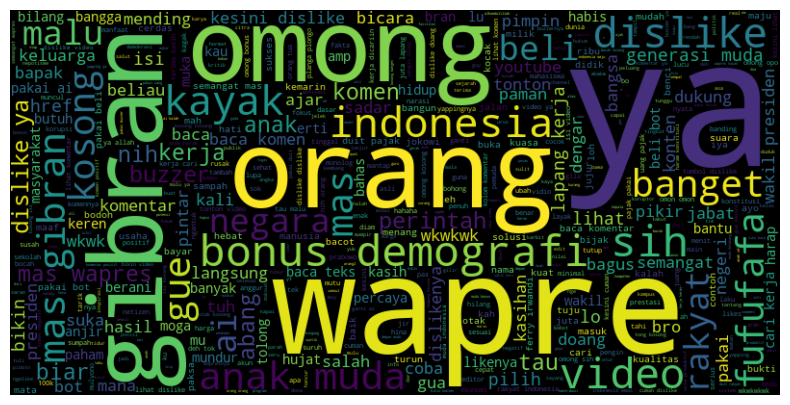

In [57]:
# Wordcloud after preprocessing
stopwords = set(STOPWORDS)

text = ' '.join(df_use['stemText'].astype(str).tolist())

wc = WordCloud(stopwords=stopwords, max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

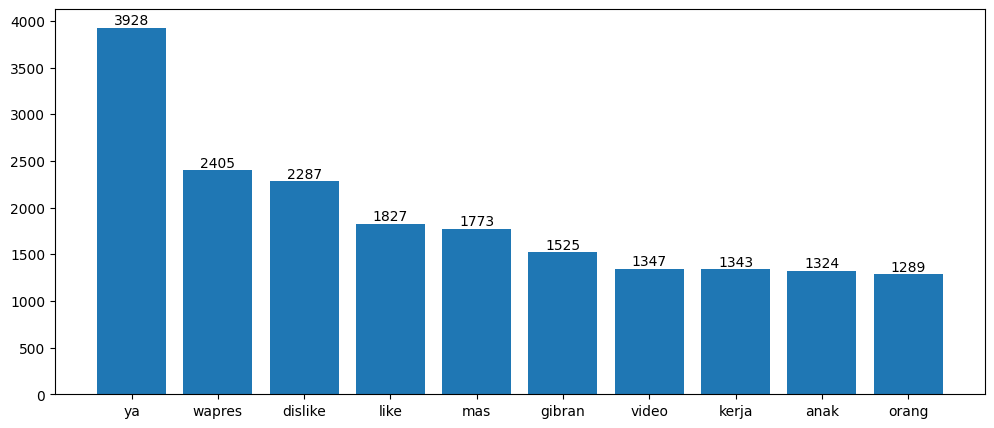

In [62]:
from collections import Counter

text = ' '.join(df_use['stemText'])

tokens = [word for word in text.split()]
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)
word, count = zip(*top_words)

plt.figure(figsize=(12,5))
bars = plt.bar(word, count)

# Add count on top of each bar
for bar, c in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(c), ha='center', va='bottom')

plt.show()

In [ ]:
from transformers import pipeline

# Ensure all cleanedText entries are strings and handle NaN
df_use['cleanedText'] = df_use['cleanedText'].astype(str).fillna("")

classifier = pipeline("text-classification", model="w11wo/indonesian-roberta-base-sentiment-classifier")
sentiments = []
for x in df_use['cleanedText']:
    try:
        if isinstance(x, str) and x.strip() != "":
            sentiments.append(classifier(x)[0]['label'])
        else:
            sentiments.append("unknown")
    except RuntimeError:
        print(f'Text too long: {x}')
        sentiments.append("error")
    except Exception as e:
        print(f"Error processing: {x}\n{e}")
        sentiments.append("error")

df_use['sentiment'] = sentiments
df_use.head()


Device set to use cpu


Text too long: Jujur gua sebenarnya ga mau komentar tpi ga enak sama yang bikin konten Kan dia ngonten ini udah capek Ya udah gua komenin aja biarpun cuma singkat Tak perlu panjang lebar biar yang baca ngak pusing Kesel juga kan baca terlalu panjang kan gak jelas apa isi komennya kaya orng kumurkumur Makanya gua komen singkat aja Tau sendiri kalau komen panjang panjang bacanya juga ngeselin banget kan Siapa juga yang mau baca kalau komennya kaya kereta api Emang kerjaan nya kita hanya baca komen doang Kalo baca 1 komen aja butuh waktu 1 jam mana sempet kita ngerjain lainnya kayak update foto selvi selvi bareng doi update status Ngomentari teman yang lainnya itu lah sebab gua anjurkan kalau komen itu singkat saja Biarpun singkat tapi bermutu itu lebih baik dri pda panjang lebar tpi ga jelas banget apa yang di omongin Contohnya kaya komenan gua ini singkat tapi mengena banget ga bikin org org pusing ga bikin org kesel klo baca gua juga kesell banget kalau ada orng yang kalo komentar itu 

,authorDisplayName,textDisplay,cleanedText,case_foldedText,normalisasi,tokenizedText,no_stop_wordText,stemText,sentiment_roberta-base-sentiment-classifier
0,@daneayu,Kalo blm pernah terpisah maut dgn pasangan blm...,Kalo blm pernah terpisah maut dgn pasangan blm...,kalo blm pernah terpisah maut dgn pasangan blm...,kalau belum pernah terpisah maut dengan pasang...,"[kalau, belum, pernah, terpisah, maut, dengan,...","[terpisah, maut, pasangan, apa2, ujiannya]",pisah maut pasang apa2 uji,positive
1,@ClanAtomicZezier,Peler lah😂😂😂<br><br><br><br><br><br><br>Press ...,Peler lahbrbrbrbrbrbrbrPress it dent go block,peler lahbrbrbrbrbrbrbrpress it dent go block,peler lahbrbrbrbrbrbrbrpress itu dent go block,"[peler, lahbrbrbrbrbrbrbrpress, itu, dent, go,...","[peler, lahbrbrbrbrbrbrbrpress, dent, go, block]",peler lahbrbrbrbrbrbrbrpress dent go block,negative
2,@TommyFransisko,Silahkan Dihujat<br>Sesuka Hati...... 😂,Silahkan DihujatbrSesuka Hati,silahkan dihujatbrsesuka hati,silakan dihujatbrsesuka hati,"[silakan, dihujatbrsesuka, hati]","[silakan, dihujatbrsesuka, hati]",sila dihujatbrsesuka hati,negative
3,@raa.02,19 juta lapangan pekerjaan nya mana gibran wap...,19 juta lapangan pekerjaan nya mana gibran wap...,19 juta lapangan pekerjaan nya mana gibran wap...,19 juta lapangan pekerjaan ya mana gibran wapr...,"[19, juta, lapangan, pekerjaan, ya, mana, gibr...","[19, juta, lapangan, pekerjaan, ya, gibran, wa...",19 juta lapang kerja ya gibran wapres sambung ...,negative
4,@langlanglajulayang,Ga ada isinya !,Ga ada isinya,ga ada isinya,tidak ada isinya,"[tidak, ada, isinya]",[isinya],isi,negative


In [ ]:
# from transformers import pipeline

# # Ensure all cleanedText entries are strings and handle NaN
# df_use['cleanedText'] = df_use['cleanedText'].astype(str).fillna("")

# classifier_fold0 = pipeline("text-classification", model="w11wo/indonesian-roberta-base-indolem-sentiment-classifier-fold-0")
# sentiments_fold0 = []
# for x in df_use['cleanedText']:
#     try:
#         if isinstance(x, str) and x.strip() != "":
#             sentiments_fold0.append(classifier_fold0(x)[0]['label'])
#         else:
#             sentiments_fold0.append("unknown")
#     except RuntimeError:
#         print(f'Text too long: {x}')
#         sentiments_fold0.append("error")
#     except Exception as e:
#         print(f"Error processing: {x}\n{e}")
#         sentiments_fold0.append("error")

# df_use['sentiment_roberta-base-indolem-sentiment-classifier-fold-0'] = sentiments_fold0
# df_use.head()

Device set to use cpu


Text too long: Jujur gua sebenarnya ga mau komentar tpi ga enak sama yang bikin konten Kan dia ngonten ini udah capek Ya udah gua komenin aja biarpun cuma singkat Tak perlu panjang lebar biar yang baca ngak pusing Kesel juga kan baca terlalu panjang kan gak jelas apa isi komennya kaya orng kumurkumur Makanya gua komen singkat aja Tau sendiri kalau komen panjang panjang bacanya juga ngeselin banget kan Siapa juga yang mau baca kalau komennya kaya kereta api Emang kerjaan nya kita hanya baca komen doang Kalo baca 1 komen aja butuh waktu 1 jam mana sempet kita ngerjain lainnya kayak update foto selvi selvi bareng doi update status Ngomentari teman yang lainnya itu lah sebab gua anjurkan kalau komen itu singkat saja Biarpun singkat tapi bermutu itu lebih baik dri pda panjang lebar tpi ga jelas banget apa yang di omongin Contohnya kaya komenan gua ini singkat tapi mengena banget ga bikin org org pusing ga bikin org kesel klo baca gua juga kesell banget kalau ada orng yang kalo komentar itu 

,authorDisplayName,textDisplay,cleanedText,case_foldedText,normalisasi,tokenizedText,no_stop_wordText,stemText,sentiment_roberta-base-sentiment-classifier,sentiment_roberta-base-indolem-sentiment-classifier-fold-0
0,@daneayu,Kalo blm pernah terpisah maut dgn pasangan blm...,Kalo blm pernah terpisah maut dgn pasangan blm...,kalo blm pernah terpisah maut dgn pasangan blm...,kalau belum pernah terpisah maut dengan pasang...,"[kalau, belum, pernah, terpisah, maut, dengan,...","[terpisah, maut, pasangan, apa2, ujiannya]",pisah maut pasang apa2 uji,positive,LABEL_0
1,@ClanAtomicZezier,Peler lah😂😂😂<br><br><br><br><br><br><br>Press ...,Peler lahbrbrbrbrbrbrbrPress it dent go block,peler lahbrbrbrbrbrbrbrpress it dent go block,peler lahbrbrbrbrbrbrbrpress itu dent go block,"[peler, lahbrbrbrbrbrbrbrpress, itu, dent, go,...","[peler, lahbrbrbrbrbrbrbrpress, dent, go, block]",peler lahbrbrbrbrbrbrbrpress dent go block,negative,LABEL_0
2,@TommyFransisko,Silahkan Dihujat<br>Sesuka Hati...... 😂,Silahkan DihujatbrSesuka Hati,silahkan dihujatbrsesuka hati,silakan dihujatbrsesuka hati,"[silakan, dihujatbrsesuka, hati]","[silakan, dihujatbrsesuka, hati]",sila dihujatbrsesuka hati,negative,LABEL_0
3,@raa.02,19 juta lapangan pekerjaan nya mana gibran wap...,19 juta lapangan pekerjaan nya mana gibran wap...,19 juta lapangan pekerjaan nya mana gibran wap...,19 juta lapangan pekerjaan ya mana gibran wapr...,"[19, juta, lapangan, pekerjaan, ya, mana, gibr...","[19, juta, lapangan, pekerjaan, ya, gibran, wa...",19 juta lapang kerja ya gibran wapres sambung ...,negative,LABEL_0
4,@langlanglajulayang,Ga ada isinya !,Ga ada isinya,ga ada isinya,tidak ada isinya,"[tidak, ada, isinya]",[isinya],isi,negative,LABEL_0


In [61]:
df_use.to_csv('labeled_sentiment.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'labeled_sentiment.csv'

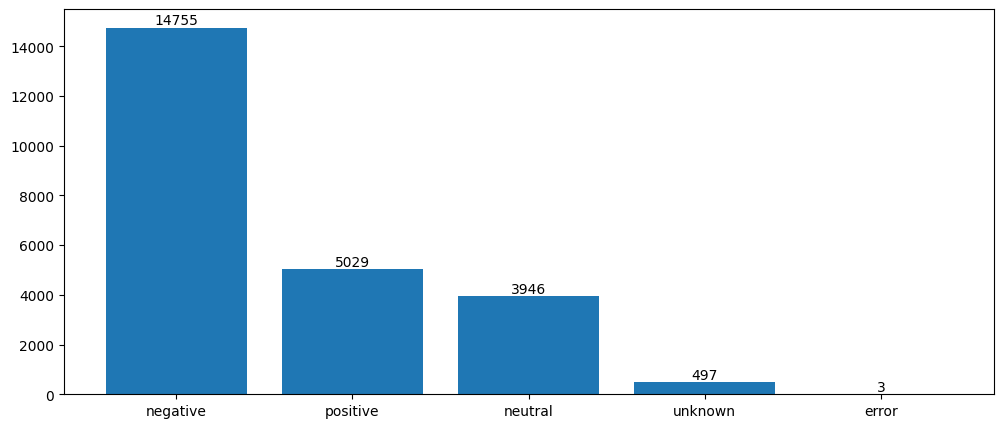

In [ ]:
from collections import Counter

text = ' '.join(df_use['sentiment'])

tokens = [word for word in text.split()]
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)
word, count = zip(*top_words)

plt.figure(figsize=(12,5))
bars = plt.bar(word, count)

# Add count on top of each bar
for bar, c in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(c), ha='center', va='bottom')

plt.show()

In [ ]:
text = ' '.join(df_use['sentiment_roberta-base-sentiment-classifier'])

tokens = [word for word in text.split()]
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)
word, count = zip(*top_words)

plt.figure(figsize=(12,5))
bars = plt.bar(word, count)

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("indolem/indobert-base-uncased")
model = AutoModel.from_pretrained("indolem/indobert-base-uncased")

pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

c:\Users\naufalmaula\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\naufalmaula\.cache\huggingface\hub\models--indolem--indobert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]